In [36]:
#setup some general use functions and import file
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


ames = pd.read_csv("train.csv") # assumes you downloaded the whole repository, modify accordingly
ames.head()

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


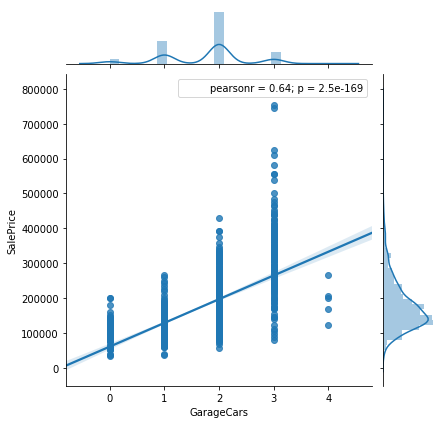

In [4]:
#GarageCars
sns.jointplot(x='GarageCars', y='SalePrice', data=ames, kind="reg")

In [6]:
ames['GarageCars'].head()

0    2
1    2
2    2
3    3
4    3
Name: GarageCars, dtype: int64

In [23]:
group_garagecars = ames.groupby('GarageCars')

In [24]:
group_garagecars.size()

GarageCars
0     81
1    369
2    824
3    181
4      5
dtype: int64

In [49]:
group_garagecars.size().sum()

1460

In [149]:
print(round(100*group_garagecars.size()/(len(ames['GarageCars'])),2))

GarageCars
0     5.55
1    25.27
2    56.44
3    12.40
4     0.34
dtype: float64


In [21]:
stats.linregress(ames.GarageCars, ames.SalePrice)

LinregressResult(slope=68077.997646347, intercept=60618.9808715238, rvalue=0.6404091972583531, pvalue=2.4986441671736333e-169, stderr=2138.212364138837)

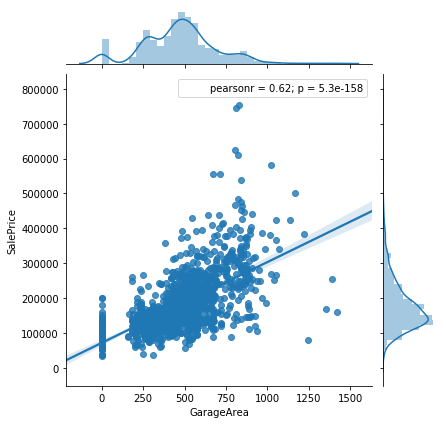

In [25]:
#GarageArea
sns.jointplot(x='GarageArea', y='SalePrice', data=ames, kind="reg")

In [152]:
count = ames.GarageArea ==0
count.sum()
#print(ames.GarageArea.isnull().sum())
#print(count.sum()/len(ames.GarageArea))

81

In [150]:
#print( count.sum()/(len(ames.GarageArea) ))
print(round(100*count.sum()/(len(ames['GarageArea'])),2))

5.55


In [29]:
stats.linregress(ames.GarageArea, ames.SalePrice)

LinregressResult(slope=231.64561450940442, intercept=71357.42140747688, rvalue=0.6234314389183616, pvalue=5.265038167976654e-158, stderr=7.608440114263162)

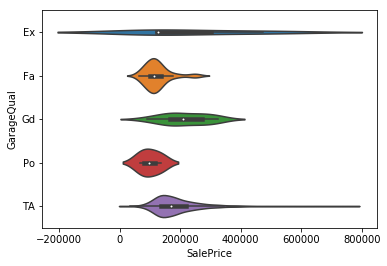

In [34]:
#GarageQual
temp = ames.GarageQual.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [ ]:
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [38]:
ames['GarageQual'].head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object

In [39]:
group_garagequal = ames.groupby('GarageQual')

In [40]:
group_garagequal.size()

GarageQual
Ex       3
Fa      48
Gd      14
Po       3
TA    1311
dtype: int64

In [51]:
group_garagequal.size().sum()

1379

In [122]:
#How do we handle missing values?
ames.GarageQual.isnull().sum()

81

In [48]:
print(round(100*group_garagequal.size()/(len(ames['GarageQual'])),1))

GarageQual
Ex     0.2
Fa     3.3
Gd     1.0
Po     0.2
TA    89.8
dtype: float64


In [37]:
mod = ols('SalePrice ~ GarageQual', data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F        PR(>F)
GarageQual  2.332568e+11     4.0  9.570389  1.240803e-07
Residual    8.372044e+12  1374.0       NaN           NaN


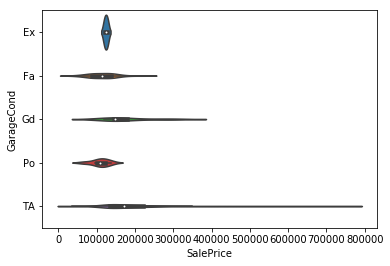

In [52]:
#GarageCond
temp = ames.GarageCond.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [ ]:
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [53]:
group_garagecond = ames.groupby('GarageCond')

In [56]:
group_garagecond.size()

GarageCond
Ex       2
Fa      35
Gd       9
Po       7
TA    1326
dtype: int64

In [57]:
group_garagecond.size().sum()

1379

In [123]:
#How do we handle missing values
ames.GarageCond.isnull().sum()

81

In [58]:
print(round(100*group_garagecond.size()/(len(ames['GarageCond'])),1))

GarageCond
Ex     0.1
Fa     2.4
Gd     0.6
Po     0.5
TA    90.8
dtype: float64


In [59]:
mod = ols('SalePrice ~ GarageCond',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F        PR(>F)
GarageCond  2.325637e+11     4.0  9.541161  1.309714e-07
Residual    8.372737e+12  1374.0       NaN           NaN


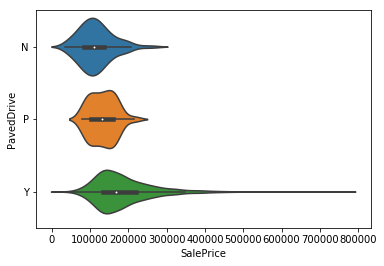

In [60]:
#PavedDrive
temp = ames.PavedDrive.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [ ]:
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [66]:
group_paveddrive = ames.groupby('PavedDrive')

In [62]:
group_paveddrive.size()

PavedDrive
N      90
P      30
Y    1340
dtype: int64

In [63]:
group_paveddrive.size().sum()

1460

In [64]:
print(round(100*group_paveddrive.size()/(len(ames['PavedDrive'])),1))

PavedDrive
N     6.2
P     2.1
Y    91.8
dtype: float64


In [76]:
ames.PavedDrive = ames.PavedDrive.str.replace('P', 'N')

In [77]:
group_paveddrive = ames.groupby('PavedDrive')

In [78]:
group_paveddrive.size()

PavedDrive
N     120
Y    1340
dtype: int64

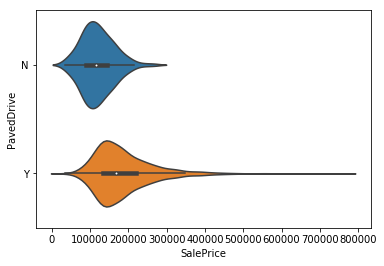

In [80]:
temp = ames.PavedDrive.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [81]:
mod = ols('SalePrice ~ PavedDrive',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df          F        PR(>F)
PavedDrive  4.954701e+11     1.0  82.915376  2.741414e-19
Residual    8.712441e+12  1458.0        NaN           NaN


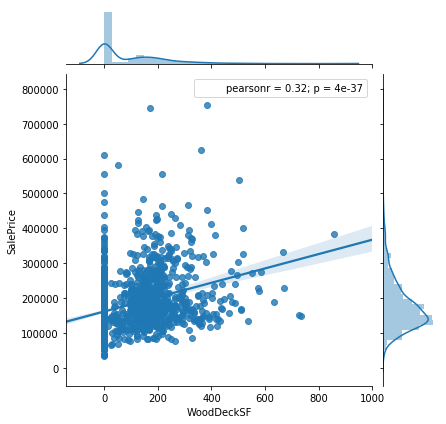

In [82]:
#WoodDeckSF

sns.jointplot(x='WoodDeckSF', y='SalePrice', data=ames, kind="reg")

In [87]:
stats.linregress(ames.WoodDeckSF, ames.SalePrice)

LinregressResult(slope=205.62042373751507, intercept=161542.59764040352, rvalue=0.32441344456812954, pvalue=3.972216535628052e-37, stderr=15.701492391416872)

In [153]:
count = ames.WoodDeckSF ==0
count.sum()

761

In [154]:
print(round(100*count.sum()/(len(ames['WoodDeckSF'])),2))

52.12


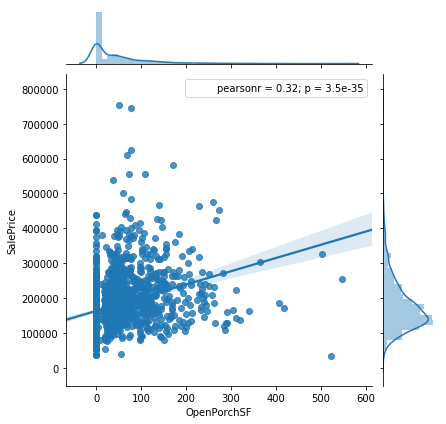

In [85]:
#OpenPorchSF

sns.jointplot(x='OpenPorchSF', y='SalePrice', data=ames, kind="reg")

In [86]:
stats.linregress(ames.OpenPorchSF, ames.SalePrice)

LinregressResult(slope=378.71888963376716, intercept=163250.06874149948, rvalue=0.3158562271160554, pvalue=3.493373623094815e-35, stderr=29.793853025441162)

In [155]:
count = ames.OpenPorchSF ==0
count.sum()

656

In [156]:
print(round(100*count.sum()/(len(ames['OpenPorchSF'])),2))

44.93


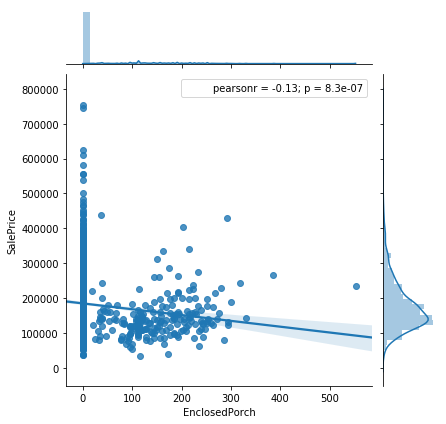

In [88]:
#EnclosedPorch

sns.jointplot(x='EnclosedPorch', y='SalePrice', data=ames, kind="reg")

In [89]:
stats.linregress(ames.EnclosedPorch, ames.SalePrice)

LinregressResult(slope=-167.12527950560423, intercept=184590.2825917761, rvalue=-0.1285779579259565, pvalue=8.255770475113626e-07, stderr=33.758015869220905)

In [158]:
count = ames.EnclosedPorch ==0
count.sum()

1252

In [159]:
print(round(100*count.sum()/(len(ames['EnclosedPorch'])),2))

85.75


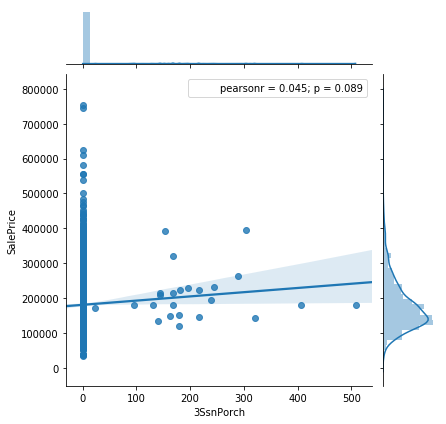

In [90]:
#3SsnPorch
sns.jointplot(x='3SsnPorch', y='SalePrice', data=ames, kind="reg")

In [91]:
stats.linregress(ames['3SsnPorch'], ames.SalePrice)

LinregressResult(slope=120.81038398448354, intercept=180509.28212912686, rvalue=0.044583665335748444, pvalue=0.08858170358056179, stderr=70.89533823577942)

In [160]:
count = ames['3SsnPorch'] ==0
count.sum()

1436

In [161]:
print(round(100*count.sum()/(len(ames['3SsnPorch'])),2))

98.36


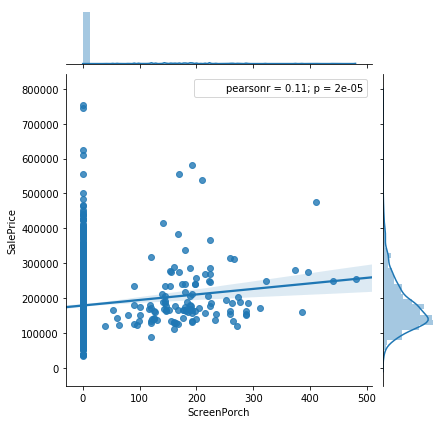

In [92]:
#ScreenPorch

sns.jointplot(x='ScreenPorch', y='SalePrice', data=ames, kind="reg")

In [93]:
stats.linregress(ames.ScreenPorch, ames.SalePrice)

LinregressResult(slope=158.78775055390145, intercept=178529.70010484263, rvalue=0.11144657114291108, pvalue=1.9721400194689517e-05, stderr=37.081525470533954)

In [162]:
count = ames['ScreenPorch'] ==0
count.sum()

1344

In [163]:
print(round(100*count.sum()/(len(ames['ScreenPorch'])),2))

92.05


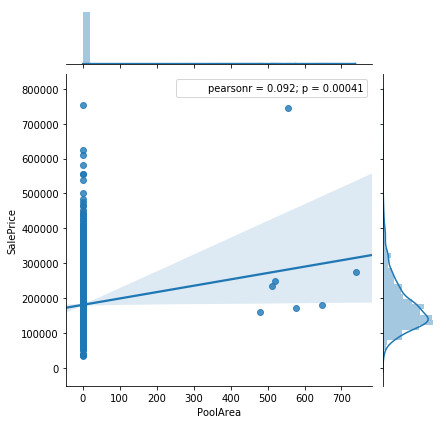

In [94]:
#PoolArea
sns.jointplot(x='PoolArea', y='SalePrice', data=ames, kind="reg")

In [95]:
stats.linregress(ames.PoolArea, ames.SalePrice)

LinregressResult(slope=182.70934030078047, intercept=180417.1183405948, rvalue=0.09240354949187315, pvalue=0.0004073489601196203, stderr=51.56218101097866)

In [164]:
count = ames['PoolArea'] ==0
count.sum()

1453

In [165]:
print(round(100*count.sum()/(len(ames['PoolArea'])),2))

99.52


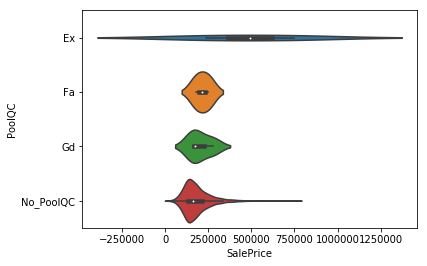

In [190]:
#PoolQC

temp = ames.PoolQC.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [ ]:
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		

In [101]:
group_poolqc = ames.groupby('PoolQC')

In [102]:
group_poolqc.size()

PoolQC
Ex    2
Fa    2
Gd    3
dtype: int64

In [103]:
group_poolqc.size().sum()

7

In [189]:
(ames.PoolQC[1])

'No_PoolQC'

In [175]:
ames.PoolQC = ames.PoolQC.astype('str')

In [183]:
(ames.PoolQC)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [185]:
ames.PoolQC.fillna('No_PoolQC', inplace = True)

In [186]:
count = ames['PoolQC'] =='No_PoolQC'
count.sum()

1453

In [187]:
print(round(100*count.sum()/(len(ames['PoolQC'])),2))

99.52


In [188]:
mod = ols('SalePrice ~ PoolQC',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
PoolQC    1.951702e+11     3.0  10.509853  7.700989e-07
Residual  9.012741e+12  1456.0        NaN           NaN


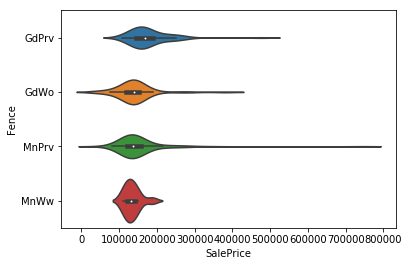

In [106]:
#Fence

temp = ames.Fence.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [ ]:
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence


In [109]:
group_fence = ames.groupby('Fence')

In [110]:
ames.groupby('Fence').size()

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
dtype: int64

In [111]:
ames.groupby('Fence').size().sum()

281

In [ ]:
How do we handle missing values?

In [191]:
type(ames.Fence[1])

float

In [192]:
ames.Fence.fillna('No_Fence', inplace = True)

In [193]:
count = ames['Fence'] =='No_Fence'
count.sum()

1179

In [194]:
print(round(100*count.sum()/(len(ames['Fence'])),2))

80.75


In [195]:
mod = ols('SalePrice ~ Fence',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
Fence     3.279372e+11     4.0  13.433276  9.379977e-11
Residual  8.879974e+12  1455.0        NaN           NaN


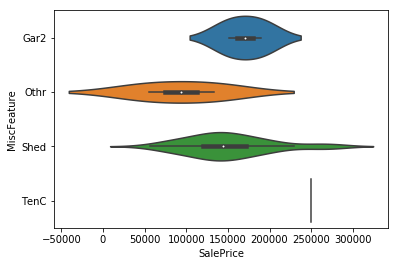

In [113]:
#MiscFeature
temp = ames.MiscFeature.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [ ]:
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [114]:
group_miscfeature = ames.groupby('MiscFeature')

In [115]:
group_miscfeature.size()

MiscFeature
Gar2     2
Othr     2
Shed    49
TenC     1
dtype: int64

In [116]:
group_miscfeature.size().sum()

54

In [117]:
print(round(100*group_miscfeature.size()/(len(ames['MiscFeature'])),1))

MiscFeature
Gar2    0.1
Othr    0.1
Shed    3.4
TenC    0.1
dtype: float64


In [196]:
ames.MiscFeature.fillna('No_MiscFeature', inplace = True)

In [197]:
count = ames['MiscFeature'] =='No_MiscFeature'
count.sum()

1406

In [199]:
print(round(100*count.sum()/(len(ames['MiscFeature'])),2))

96.3


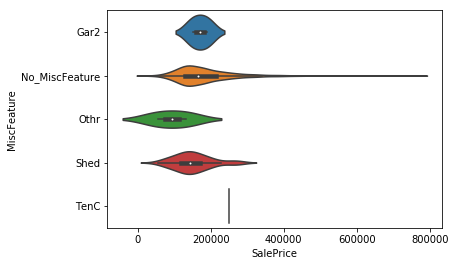

In [200]:
temp = ames.MiscFeature.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [209]:
mod = ols('SalePrice ~ MiscFeature',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df         F    PR(>F)
MiscFeature  6.518974e+10     4.0  2.593622  0.035004
Residual     9.142722e+12  1455.0       NaN       NaN


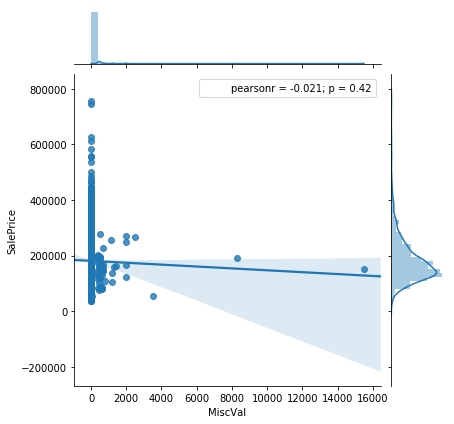

In [202]:
#MiscVal


sns.jointplot(x='MiscVal', y='SalePrice', data=ames, kind="reg")

In [208]:
stats.linregress(ames.MiscVal, ames.SalePrice)

LinregressResult(slope=-3.3930157615667, intercept=181068.7548923047, rvalue=-0.021189579640303248, pvalue=0.4184863494080361, stderr=4.192636908727935)

In [205]:
count = ames['MiscVal'] ==0
count.sum()

1408

In [206]:
print(round(100*count.sum()/(len(ames['MiscVal'])),2))

96.44


In [207]:
mod = ols('SalePrice ~ MiscVal',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
MiscVal   4.134336e+09     1.0  0.654934  0.418486
Residual  9.203777e+12  1458.0       NaN       NaN


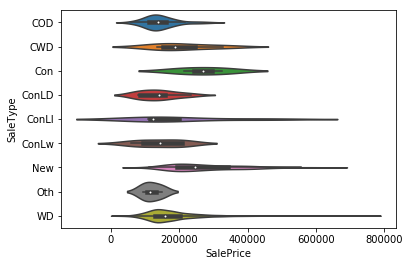

In [210]:
#SaleType

temp = ames.SaleType.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [ ]:
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [219]:
group_SaleType = ames.groupby('SaleType')

In [220]:
group_SaleType.size()

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
dtype: int64

In [221]:
group_SaleType.size().sum()

1460

In [222]:
print(round(100*group_SaleType.size()/(len(ames['SaleType'])),2))

SaleType
COD       2.95
CWD       0.27
Con       0.14
ConLD     0.62
ConLI     0.34
ConLw     0.34
New       8.36
Oth       0.21
WD       86.78
dtype: float64


In [217]:
mod = ols('SalePrice ~ SaleType',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
SaleType  1.264131e+12     8.0  28.863054  5.039767e-42
Residual  7.943780e+12  1451.0        NaN           NaN


In [ ]:
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [212]:
group_SaleCondition = ames.groupby('SaleCondition')

In [213]:
group_SaleCondition.size()

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
dtype: int64

In [214]:
group_SaleCondition.size().sum()

1460

In [215]:
group_SaleCondition.size()/len(ames['SaleCondition'])

SaleCondition
Abnorml    0.069178
AdjLand    0.002740
Alloca     0.008219
Family     0.013699
Normal     0.820548
Partial    0.085616
dtype: float64

In [216]:
print(round(100*group_SaleCondition.size()/(len(ames['SaleCondition'])),2))

SaleCondition
Abnorml     6.92
AdjLand     0.27
Alloca      0.82
Family      1.37
Normal     82.05
Partial     8.56
dtype: float64


In [218]:
mod = ols('SalePrice ~ SaleCondition',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq      df          F        PR(>F)
SaleCondition  1.247649e+12     5.0  45.578428  7.988268e-44
Residual       7.960263e+12  1454.0        NaN           NaN
